In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [31]:
# node from 1 to 200
# G = nx.erdos_renyi_graph(20, 0.15,seed=101)
# >>> petersen = nx.petersen_graph()
# >>> tutte = nx.tutte_graph()
# >>> maze = nx.sedgewick_maze_graph()
# >>> tet = nx.tetrahedral_graph()

# >>> K_5 = nx.complete_graph(5)
# >>> K_3_5 = nx.complete_bipartite_graph(3, 5)
# >>> barbell = nx.barbell_graph(10, 10)
# >>> lollipop = nx.lollipop_graph(10, 20)

# >>> er = nx.erdos_renyi_graph(100, 0.15)
# >>> ws = nx.watts_strogatz_graph(30, 3, 0.1)
# >>> ba = nx.barabasi_albert_graph(100, 5)
# >>> red = nx.random_lobster(100, 0.9, 0.9)

In [32]:
'''
optins:
1. random_lobster: nx.random_lobster(100, 0.9, 0.9)
2. munaully: 
'''

'\noptins:\n1. random_lobster: nx.random_lobster(100, 0.9, 0.9)\n2. munaully: \n'

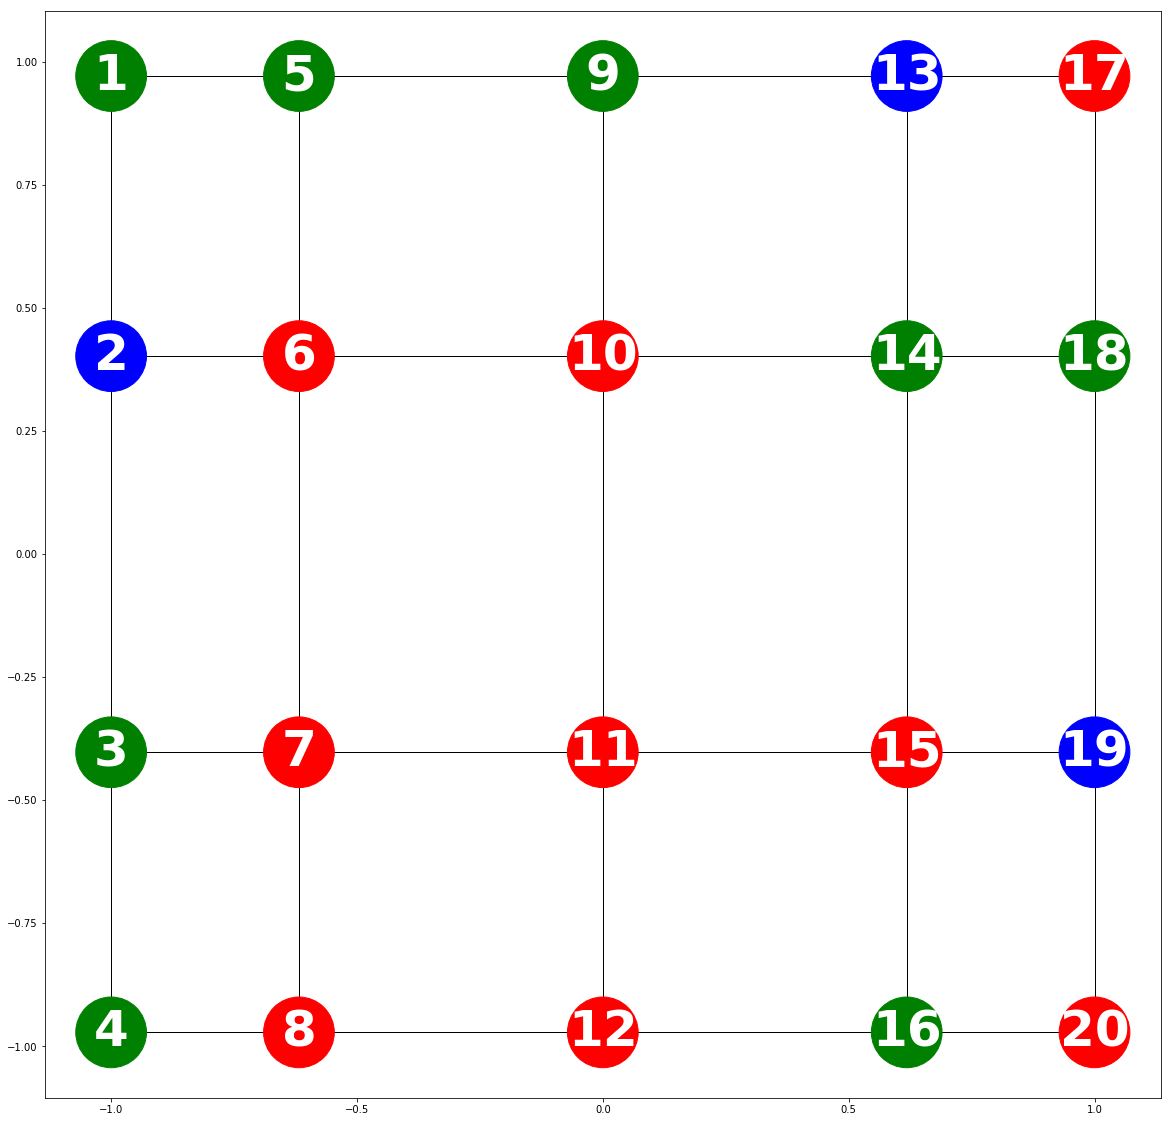

In [33]:
x = 5
y = 4
num_nodes = x * y
colour_list = ['Red', 'Green', 'Blue']

colour_to_idx = {
    'Red':1,
    'Green':2,
    'Blue':3,
}
np.random.seed(101)
colour_assign = [ np.random.choice(colour_list) for i in range(num_nodes)]
colour_dict = {}
for i in range(num_nodes):
    colour_dict[i+1] = {'Colour': colour_assign[i]}
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(x,y),1)
nx.set_node_attributes(G, colour_dict)
fig, ax = plt.subplots(figsize= (20,20))
#plt.subplot(121)
#nx.draw_shell(G,with_labels=True, font_weight='bold')
#nx.draw(G, with_labels=True, font_weight='bold', font_size = 50,)
nx.draw_networkx(G , pos=nx.spectral_layout(G), with_labels = True, node_color = colour_assign, font_size = 50,
                 font_weight = 'bold', node_size = 5000, font_color = 'white')
fig.savefig('./Graph.png')

In [5]:
# Used for finding the path from source to target.
# Positvie Pair
# How abt the len?
# np.random.choice(list(nx.all_simple_paths(G,1,5)), size = 2)
# P: the leght is not contolable


# Draft 

# # For generating the positive paths with the same length

# while True:
#     st_end = np.random.choice(G.nodes,2)
#     paths_ =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
#     idx = [len(i) == 10 for i in paths_] # Certain path
#     # np.random.choice(list([paths_[i] for i,n in enumerate(idx) if n]),size= 2)
#     k = [paths_[i] for i,n in enumerate(idx) if n]
#     if len(k) == 0:
#         continue
#     rd_idx = np.random.choice(len(k), 2)
#     k_out = [k[i] for i in rd_idx]
#     break
    
    
#  # For generating the negaive pairs
# while True:  
#     k_out = []
#     st_end = np.random.choice(G.nodes,3)
#     if len(list(set(n)))<3:
#         continue
#     paths_1 =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
#     idx = [len(i) == 10 for i in paths_1] # Certain path
#     # np.random.choice(list([paths_[i] for i,n in enumerate(idx) if n]),size= 2)
#     k = [paths_1[i] for i,n in enumerate(idx) if n]
#     if len(k) == 0:
#         continue
#     rd_idx = np.random.choice(len(k), 1)
#     #k_out.append([k[i] for i in rd_idx])
#     k_out.append(k[rd_idx[0]])
 
#     #l = [x for x in G.nodes if x != 5] # Select a random end node,
#     ll = list(nx.all_simple_paths(G,st_end[0],st_end[2]))
#     idx_ll = [len(i) == 10 for i in ll]
#     l_l = [ll[i] for i,n in enumerate(idx_ll) if n]
#     if len(l_l) == 0:
#         continue
#     rd_idx_l = np.random.choice(len(l_l), 1) # only one? 
#     #out = [l_l[i] for i in rd_idx_l]
#     k_out.append(l_l[rd_idx_l[0]])
#     break
    

In [34]:
def CreatingColourPositivePairs(num_pairs = 10, seqlen = 10, random_seed = None):
    
    paired_data = []
    if random_seed != None:
        np.random.seed(random_seed)    
    for i in range(num_pairs):
        while True:
            st_end = np.random.choice(G.nodes,2)
            paths_ =  list(nx.all_simple_paths(G, st_end[0], st_end[1]))
            idx = [len(i) == seqlen for i in paths_] # Certain path
            paths_len = [paths_[i] for i,n in enumerate(idx) if n]
            if len(paths_len) == 0:
                continue
            rd_idx = np.random.choice(len(paths_len), 2)
            out = [paths_len[i] for i in rd_idx]
            break
        paired_dict = {'left':out[0],'right':out[1],'target':1}
        paired_data.append(paired_dict)
        
    return paired_data

In [35]:
def CreatingColourNegativePairs(num_pairs=10, seqlen= 10, random_seed=None):
    
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        while True:  
            out = []
            st_end = np.random.choice(G.nodes,3)
            if len(list(set(st_end))) < 3:
                continue
            paths_ =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
            idx = [len(i) == seqlen for i in paths_] # Certain path
            paths_len = [paths_[i] for i,n in enumerate(idx) if n]
            if len(paths_len) == 0:
                continue
            rd_idx = np.random.choice(len(paths_len), 1)
            out.append(paths_len[rd_idx[0]])

            paths_2 = list(nx.all_simple_paths(G,st_end[0],st_end[2]))
            idx_2 = [len(i) == 10 for i in paths_2]
            paths_len_2 = [paths_2[i] for i,n in enumerate(idx_2) if n]
            if len(paths_len_2) == 0:
                continue
            rd_idx_2 = np.random.choice(len(paths_len_2), 1) # only one? 
            out.append(paths_len_2[rd_idx_2[0]])
            break   
        unpaired_dict = {'left':out[0],'right':out[1],'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data

In [36]:
def TransferToColourIdx(pairs):
    for p in pairs:
        for k,node in enumerate(p['left']):
            p['left'][k] = colour_to_idx[G.nodes[node]['Colour']]
        for k,node in enumerate(p['right']):
            p['right'][k] = colour_to_idx[G.nodes[node]['Colour']]
            
    return pairs

In [38]:
num_data = 10000
a = pd.DataFrame(TransferToColourIdx(CreatingColourPositivePairs(num_data, seqlen = 10, random_seed= 101)))
b = pd.DataFrame(TransferToColourIdx(CreatingColourNegativePairs(num_data, seqlen = 10, random_seed= 101)))
data = pd.concat([a,b])
with open("PlanarColour10thData.txt", "wb") as fp:   #Pickling
     pickle.dump(data, fp) 
data

,left,right,target
0,"[2, 1, 1, 1, 2, 3, 2, 2, 2, 1]","[2, 1, 3, 1, 1, 1, 1, 2, 2, 1]",1
1,"[2, 1, 1, 1, 1, 3, 2, 2, 1, 2]","[2, 2, 3, 1, 1, 2, 2, 1, 3, 2]",1
2,"[1, 2, 1, 1, 1, 1, 2, 2, 1, 1]","[1, 3, 2, 1, 3, 2, 1, 2, 2, 1]",1
3,"[2, 2, 1, 1, 1, 1, 2, 1, 3, 2]","[2, 1, 1, 1, 1, 1, 2, 1, 2, 2]",1
4,"[2, 2, 1, 1, 1, 1, 2, 1, 2, 1]","[2, 1, 2, 3, 1, 2, 3, 1, 2, 1]",1
5,"[2, 2, 1, 1, 1, 1, 1, 1, 2, 3]","[2, 3, 1, 1, 1, 1, 2, 1, 2, 3]",1
6,"[1, 1, 1, 2, 2, 3, 1, 1, 2, 3]","[1, 1, 2, 1, 2, 1, 1, 2, 2, 3]",1
7,"[2, 2, 1, 3, 2, 2, 1, 1, 1, 1]","[2, 2, 1, 3, 2, 2, 1, 1, 1, 1]",1
8,"[2, 2, 3, 1, 1, 2, 1, 2, 1, 1]","[2, 2, 3, 1, 2, 2, 1, 1, 1, 1]",1
9,"[1, 1, 3, 2, 1, 1, 1, 1, 1, 3]","[1, 1, 1, 2, 2, 1, 1, 2, 1, 3]",1


In [10]:
# num_data = 1000
# a = pd.DataFrame(CreatingPlanerPositivePairs(num_data, seqlen=5, random_seed=101))
# b = pd.DataFrame(CreatingPlanarNegativePairs(num_data, seqlen=5, random_seed=101))
# data = pd.concat([a,b])
# with open("PlanarColourData.txt", "wb") as fp:   #Pickling
#      pickle.dump(data, fp) 
# data

# Generate random data

I use these two function to perform the random walk and generate data.

In [11]:
# def CreatingPlanerPositivePairs(num_pairs = 10, seqlen = 5, random_seed = None):
    
#     paired_data = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         st_node = np.random.randint(1,21) # random sample a start node
#         node = st_node
#         left = []
#         right = []
#         for j in range(seqlen):
#             node = np.random.choice(list(G.adj[node]))
#             left.append(colour_to_idx[G.nodes[node]['Colour']])
#         node = st_node
#         for j in range(seqlen):
#             node = np.random.choice(list(G.adj[node]))
#             right.append(colour_to_idx[G.nodes[node]['Colour']])
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data

# def CreatingPlanarNegativePairs(num_pairs=10, seqlen= 50, prob = 0.7, random_seed=None, num_noise=1):
    
#     unpaired_data=[]
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         st_node = np.random.randint(1,21)
#         left = []
#         node = st_node 
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(colour_to_idx[G.nodes[node]['Colour']]) 
#         k=0
#         while k < num_noise:
#             k=0
#             if np.random.uniform(0,1) > 0.5:
#                 node = st_node # Use the same st_node
#             else:
#                 node = np.random.choice([x for x in np.arange(1,21) if not x == st_node])
#                 # node = np.random.randint(1,21) # or start from anotehr node
#             right = []
#             for j in range(seqlen):
#                 if  np.random.uniform(0,1) > prob:
#                     k+=1
#                     NotConnectedNodes = [x for x in np.arange(1,21) if x not in list(G.adj[node])]
#                     node =np.random.choice(NotConnectedNodes)
#                 else:    
#                     node =np.random.choice(list(G.adj[node]))
#                 right.append(colour_to_idx[G.nodes[node]['Colour']])
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data

In [12]:
#Positive pair
# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     '''
#     number_pairs: numbers of rows will be generated
#     seqlen: The length of sequence    
#     It will randomly chose a starting node and perfrom random walk to
#     retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
#     right side and be stored in paired_dict.
#     '''
#     paired_data=[]
#     left = [] 
#     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201) 
#         nodes= [node]
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             nodes.append(node)
#         splitor = np.random.randint(1,seqlen)
#         left = nodes[:splitor+1]
#         right = nodes[splitor:]
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data 

# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     paired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         right = [node]
#         for j in range(seqlen-1):
#             node = np.random.choice(list(G.adj[node]))
#             right.append(node)
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data

# def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
#     unpaired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         st_node = node    
#         k=0
#         while k <= num_noise:
#             k=0
#             try_right=[st_node]
#             for j in range(seqlen-1):
#                 if np.random.rand() < prob:
#                     k+=1
#                     NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[try_right[-1]])]
#                     node =np.random.choice(NotConnectedNode)
#                 else:    
#                     node =np.random.choice(list(G.adj[try_right[-1]]))
#                 try_right.append(node)
#         right= try_right
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data

In [13]:
# num_data = 1000
# a = pd.DataFrame(CreatingPlanerPositivePairs(num_data, seqlen=5, random_seed=101))
# b = pd.DataFrame(CreatingPlanarNegativePairs(num_data, seqlen=5, random_seed=101))
# data = pd.concat([a,b])
# with open("PlanarColourData.txt", "wb") as fp:   #Pickling
#      pickle.dump(data, fp) 
# data